In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve("https://raw.githubusercontent.com/oxai4science/sdoml-lite/refs/heads/main/degradation/v8/degrad_94.csv", "v8_degrad_94.csv");

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('v8_degrad_94.csv', header=None)
df

,0,1
0,2010-05-01T12:00:00.000,1.00000
1,2010-05-02T12:00:00.000,1.00000
2,2010-05-03T12:00:00.000,1.00000
3,2010-05-04T12:00:00.000,1.00000
4,2010-05-05T12:00:00.000,1.00000
...,...,...
5180,2024-07-06T11:59:57.000,0.74185
5181,2024-07-07T11:59:57.000,0.74185
5182,2024-07-08T11:59:57.000,0.74185
5183,2024-07-09T11:59:57.000,0.74185


In [ ]:
urlretrieve("https://hesperia.gsfc.nasa.gov/ssw/sdo/aia/response/aia_V8_20171210_050627_response_table.txt", "aia_V8_20171210_050627_response_table.txt");

In [ ]:
from aiapy.calibrate.util import get_correction_table

In [ ]:
correction_table = get_correction_table(correction_table='aia_V8_20171210_050627_response_table.txt')

In [ ]:
import numpy as np
import astropy.units as u
from astropy.time import Time
from aiapy.calibrate import degradation

In [ ]:
start_time = Time("2010-05-01T12:00:00", scale="utc")
end_time   = Time("2024-07-10T12:00:00", scale="utc")
times = start_time + np.arange(0, (end_time - start_time).to(u.day).value, 1) * u.day
len(times)

5185

In [ ]:
degrad_94 = degradation(94*u.angstrom, times, correction_table=correction_table, calibration_version=8)

In [ ]:
degrad_94

<Quantity [1.        , 1.        , 1.        , ..., 0.74184989, 0.74184989,
           0.74184989]>

In [ ]:
degrad_94.value

array([1.        , 1.        , 1.        , ..., 0.74184989, 0.74184989,
       0.74184989], shape=(5185,))

In [ ]:
df_aiapy = pd.DataFrame({'time':times.value, 'degrad':degrad_94.value})
df_aiapy

,time,degrad
0,2010-05-01T12:00:00.000,1.00000
1,2010-05-02T12:00:00.000,1.00000
2,2010-05-03T12:00:00.000,1.00000
3,2010-05-04T12:00:00.000,1.00000
4,2010-05-05T12:00:00.000,1.00000
...,...,...
5180,2024-07-06T11:59:57.000,0.74185
5181,2024-07-07T11:59:57.000,0.74185
5182,2024-07-08T11:59:57.000,0.74185
5183,2024-07-09T11:59:57.000,0.74185


In [ ]:
import matplotlib.pyplot as plt

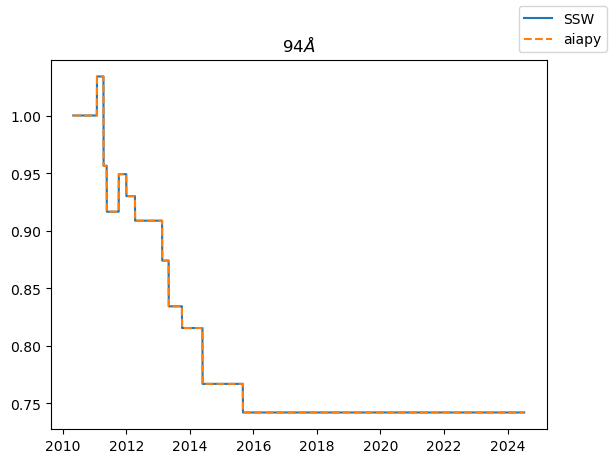

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pd.to_datetime(df[0]), df[1], label='SSW')
ax.plot(pd.to_datetime(df_aiapy['time']), df_aiapy['degrad'], label='aiapy', linestyle='--')
ax.set_title('$94 \AA$')
fig.legend()
plt.show()

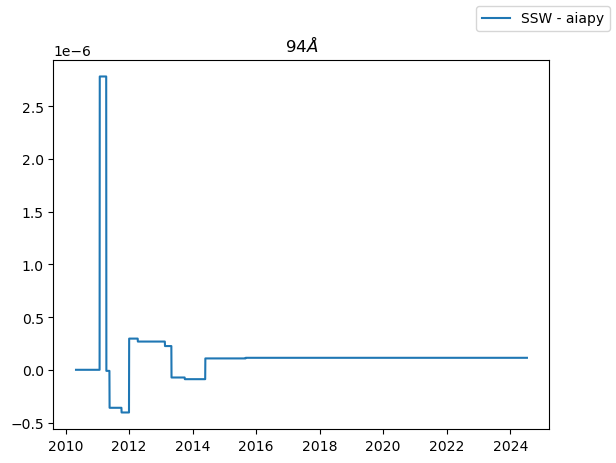

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pd.to_datetime(df[0]), df[1]- df_aiapy['degrad'], label='SSW - aiapy')
ax.set_title('$94 \AA$')
fig.legend()
plt.show()

In [ ]:
degrad_ssw = np.array(df[1])
degrad_aiapy = np.array(df_aiapy['degrad'])

np.allclose(degrad_ssw, degrad_aiapy)

True